Installing bing image downloader


In [26]:
!pip install bing-image-downloader
!pip install ipython-autotime
%load_ext autotime


time: 238 µs (started: 2021-02-14 07:00:27 +00:00)


In [7]:
!mkdir images

time: 112 ms (started: 2021-02-14 03:13:34 +00:00)


In [8]:
from bing_image_downloader import downloader
downloader.download("Round Ball", limit=50,output_dir = 'images', adult_filter_off = True)



[!!]Indexing page: 1

[%] Indexed 50 Images on Page 1.


[%] Downloading Image #1 from https://images9.qualitylogoproducts.com/stress-balls/round-stress-ball-superextralarge-270173.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://res.cloudinary.com/mp-assets/image/upload/f_auto/v1449161903/minespress/catalogassets/0010437_0.png
[%] File Downloaded !

[%] Downloading Image #3 from https://images3.qualitylogoproducts.com/stress-balls/round-stress-ball-superextralarge-379804.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://images9.qualitylogoproducts.com/stress-balls/round-stress-ball-superextralarge-262390.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://images8.qualitylogoproducts.com/stress-balls/round-stress-ball-superextralarge-379789.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://images1.qualitylogoproducts.com/stress-balls/round-stress-ball-superextralarge-270175.jpg
[%] File Downloaded !

[%] Downloading Image #7 f

KeyboardInterrupt: ignored

time: 6.94 s (started: 2021-02-14 03:13:35 +00:00)


In [ ]:
downloader.download("Baseball bat", limit=100,output_dir = 'images', adult_filter_off = True)
downloader.download("Baseball glove", limit=100,output_dir = 'images', adult_filter_off = True)

preprocessing


In [20]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/drive/MyDrive/images'
CATEGORIES = ['Round Ball', 'Baseball bat', 'Baseball glove']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path, img))
    img_resized = resize(img_array,(200,200,3))#resize
    flat_data.append(img_resized.flatten())#falttening
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
images = np.array(target)
images = np.array(images)
    

In [ ]:
import matplotlib.pyplot as plt

<BarContainer object of 3 artists>

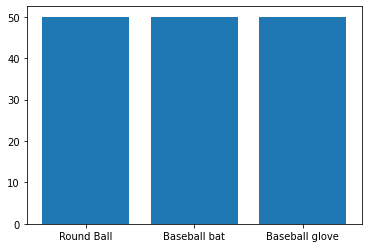

In [4]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

Spliting for train and testing 

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(flat_data, target, test_size=0.3,random_state=109)


Grid Search

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1,10,100,1000], 'kernel': ['poly']},
              {'C': [1,10,100,1000], 'kernel': ['rbf'], 'gamma': [0.1,0.001,0.0001]}]
svc = svm.SVC(probability = True)
grid_search = GridSearchCV(estimator=svc, param_grid=parameters)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['poly']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.001, 0.0001], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
from sklearn.svm import SVC
clf = SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['poly']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.001, 0.0001], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
clf.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

Accuracy


In [27]:
#predicting the test set results
y_pred = clf.predict(X_test)
print(y_pred)

#Making the confusion matix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,y_pred)
print(cm)

accuracy = accuracy_score(Y_test,y_pred)
print(accuracy)

[2 1 2 0 2 1 1 2 1 2 2 1 1 0 0 0 1 1 1 1 1 0 2 0 1 1 1 0 1 2 1 2 1 2 2 1 0
 2 2 1 1 1 1 2 0]
[[ 8  4  0]
 [ 1 16  0]
 [ 0  2 14]]
0.8444444444444444
time: 818 ms (started: 2021-02-14 07:00:49 +00:00)


Making sure the Accuarcy is right

In [15]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=grid_search, X=X_train, y=Y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation :{:.2f} %".format(accuracies.std()*100))


Accuracy: 76.27 %
Standard Deviation :10.97 %
time: 1h 40min 53s (started: 2021-02-14 03:28:12 +00:00)


saving the model


In [28]:
import pickle
pickle.dump(grid_search, open('img_model.p', 'wb'))
model =pickle.load(open('img_model.p','rb'))
flat_data=[] 

time: 206 ms (started: 2021-02-14 07:01:14 +00:00)


Testing a new image

(703, 1250, 3)
 PREDICTED OUTPUT:Round Ball


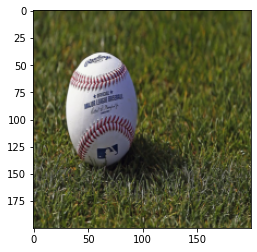

time: 475 ms (started: 2021-02-14 07:01:17 +00:00)


In [29]:
flat_data = []
url = 'https://s7d2.scene7.com/is/image/TWCNews/mlb_baseball_jpeg?wid=1250&hei=703&$wide-bg$' #base ball
img = imread(url)
img_resized = resize(img,(200,200,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT:{y_out}')
